# 🦸 Marvel Characters Dataset: Exploratory Data Analysis (EDA)

## 🔍 Questions to Explore

1. What are the basic characteristics of the dataset?
2. How many characters are heroes, villains, or neutral?
3. What are the average powers by alignment?
4. Who are the most powerful Marvel characters?
5. What attributes contribute most to total power?
6. How are attributes distributed (e.g., Intelligence, Power)?
7. Is there a correlation between different abilities?

### 1. Load and Preview the Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

marvel = pd.read_csv("datasets/characters_stats.csv")
marvel.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [4]:
marvel.columns

Index(['Name', 'Alignment', 'Intelligence', 'Strength', 'Speed', 'Durability',
       'Power', 'Combat', 'Total'],
      dtype='object')

### 2. Dataset Info and Missing Values

In [6]:
marvel.info()
marvel.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

### 3. Alignment Distribution (Hero, Villain, Neutral)

C:\Users\Yahya\AppData\Local\Temp\ipykernel_4308\3003236973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=marvel, x='Alignment', palette='Set2')


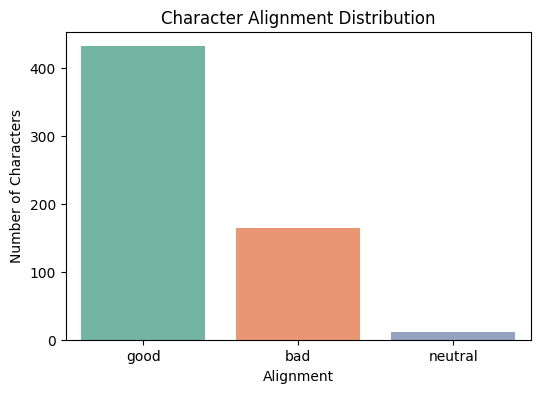

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=marvel, x='Alignment', palette='Set2')
plt.title('Character Alignment Distribution')
plt.ylabel('Number of Characters')
plt.xlabel('Alignment')
plt.show()

### 4. Average Power Stats by Alignment

<Figure size 1000x600 with 0 Axes>

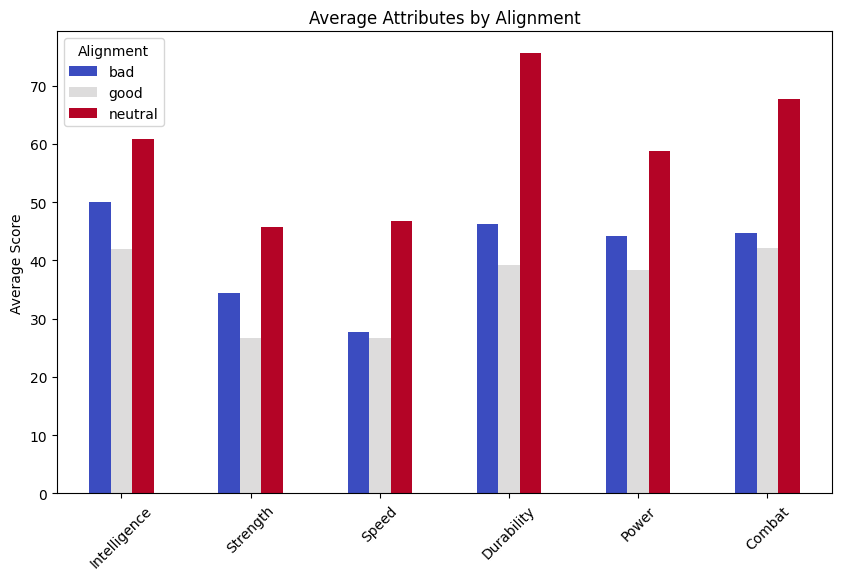

In [8]:
attributes = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
avg_stats = marvel.groupby('Alignment')[attributes].mean()

plt.figure(figsize=(10,6))
avg_stats.T.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title('Average Attributes by Alignment')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Alignment')
plt.show()

### 5. Top 10 Characters by Total Power

In [9]:
top_10 = marvel.sort_values(by='Total', ascending=False)[['Name', 'Total', 'Alignment']]
top_10.head(10)

,Name,Total,Alignment
361,Martian Manhunter,581,good
535,Superboy-Prime,579,bad
537,Superman,579,good
242,General Zod,579,bad
16,Amazo,575,bad
525,Stardust,568,good
238,Galactus,553,neutral
82,Bizarro,550,neutral
546,Thor,546,good
203,Dormammu,546,bad


### 6. Distribution of Each Attribute

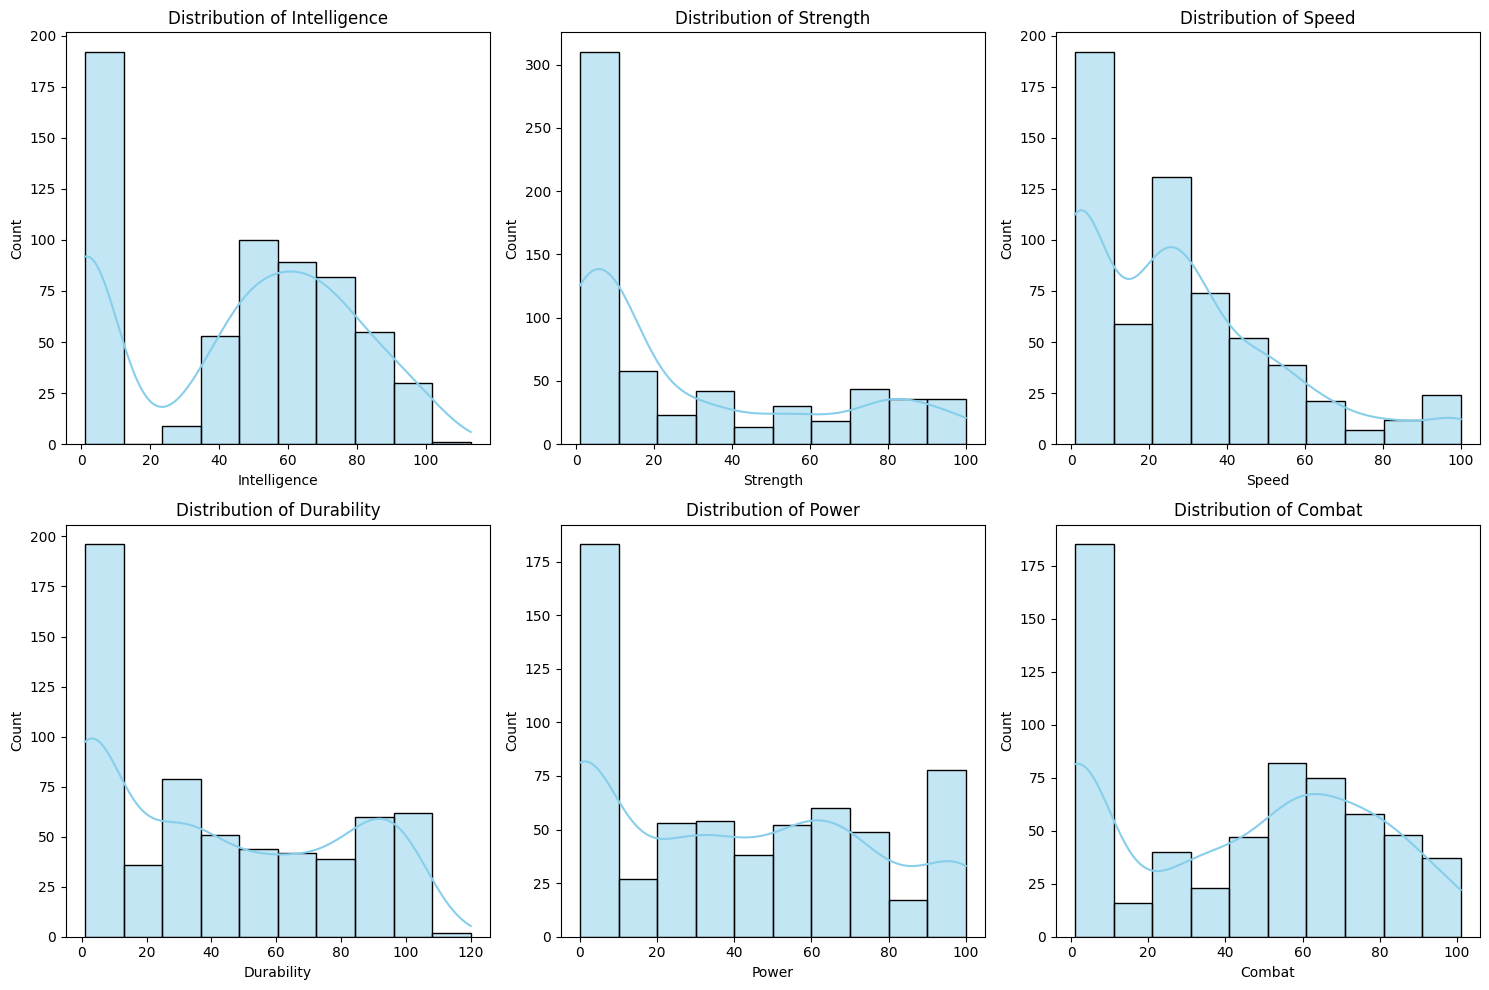

In [10]:
plt.figure(figsize=(15, 10))
for i, attr in enumerate(attributes):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=marvel, x=attr, bins=10, kde=True, color='skyblue')
    plt.title(f'Distribution of {attr}')
plt.tight_layout()
plt.show()

### 7. Correlation Heatmap of Attributes

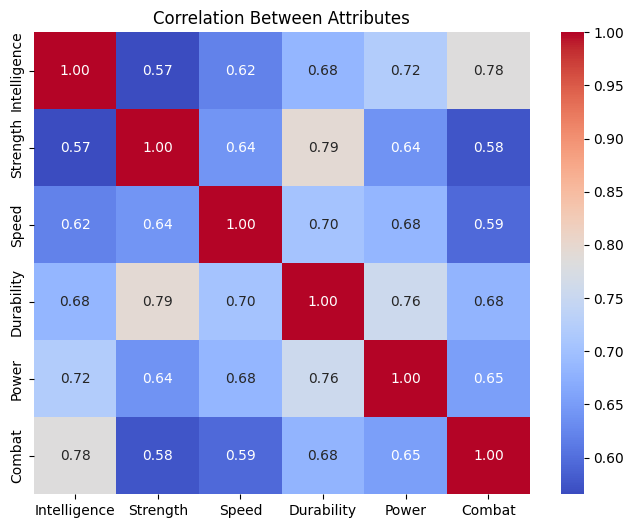

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(marvel[attributes].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Attributes")
plt.show()

### 8. Intelligence vs Combat (example pair plot)

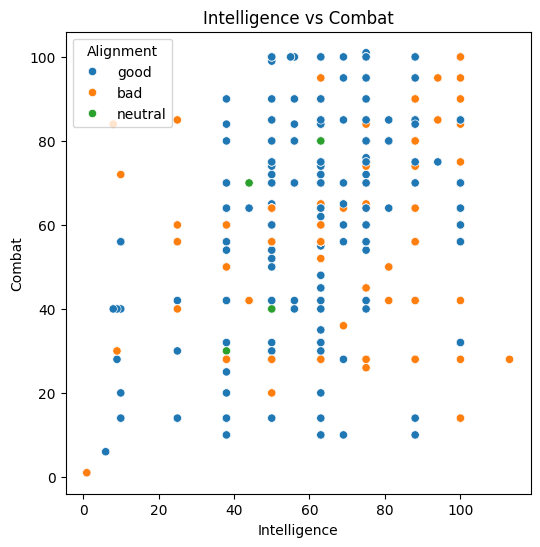

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=marvel, x='Intelligence', y='Combat', hue='Alignment')
plt.title('Intelligence vs Combat')
plt.show()

### More EDA

In [13]:
marvel["Alignment"].value_counts()

Alignment
good       432
bad        165
neutral     11
Name: count, dtype: int64

In [19]:
good = marvel[marvel["Alignment"] == "good"]
good.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


In [21]:
good.sort_values(by=["Speed"], ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
232,Flash IV,good,63,10,100,32,59,48,312
295,Impulse,good,50,10,100,60,63,60,343
304,Jack of Hearts,good,63,55,100,30,70,30,348
333,Krypto,good,9,80,100,90,72,40,391
85,Black Bolt,good,75,67,100,84,100,56,482


In [22]:
good.sort_values(by=["Power"], ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
589,Watcher,good,100,80,67,89,100,56,492
583,War Machine,good,63,80,63,100,100,85,491
547,Thor Girl,good,75,83,70,84,100,70,482
546,Thor,good,69,100,92,100,100,85,546
525,Stardust,good,88,85,100,110,100,85,568


In [23]:
good_max_power_full = good[good["Power"] == 100]

In [24]:
good_max_power_full.shape

(33, 9)

In [26]:
good_max_power_full.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335


In [29]:
good_max_total = good.sort_values(by=["Total"], ascending=False)
good_max_total.head(3)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
537,Superman,good,100,100,100,100,94,85,579
525,Stardust,good,88,85,100,110,100,85,568


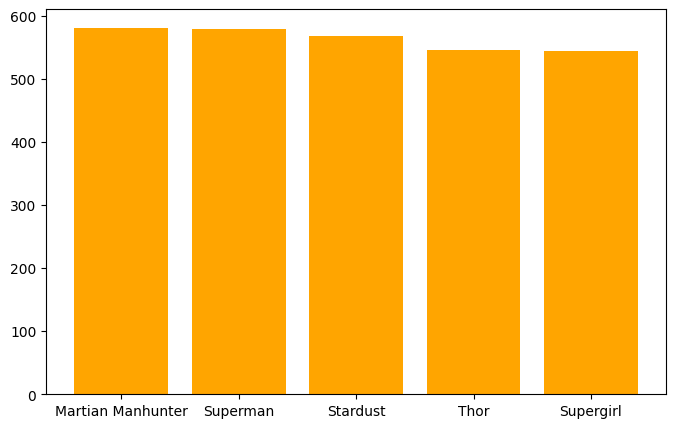

In [30]:
plt.figure(figsize=(8,5))
plt.bar(list(good_max_total["Name"])[0:5], list(good_max_total["Total"])[0:5], color="orange");

In [32]:
bad = marvel[marvel["Alignment"]=="bad"]
bad.head(3)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460


In [34]:
bad.sort_values(by=["Speed"], ascending=False).head(3)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
535,Superboy-Prime,bad,94,100,100,100,100,85,579


In [35]:
bad.sort_values(by=["Intelligence"], ascending=False).head(3)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
122,Brainiac,bad,100,28,63,90,60,75,416
315,Joker,bad,100,10,12,56,22,90,290


In [36]:
bad.sort_values(by=["Total"], ascending=False).head(3)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
16,Amazo,bad,75,100,100,100,100,100,575


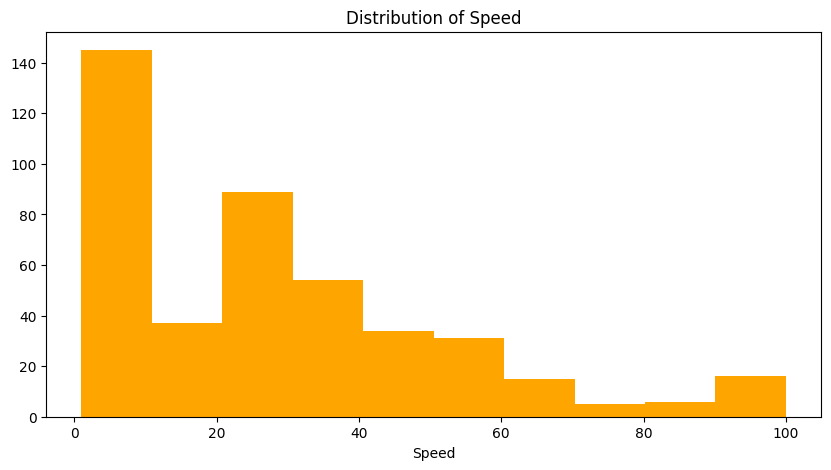

In [39]:
# Making a histogram for speed of good superheroes
plt.figure(figsize=(10,5))
plt.hist(good["Speed"], color="orange")
plt.title("Distribution of Speed")
plt.xlabel("Speed")
plt.show()

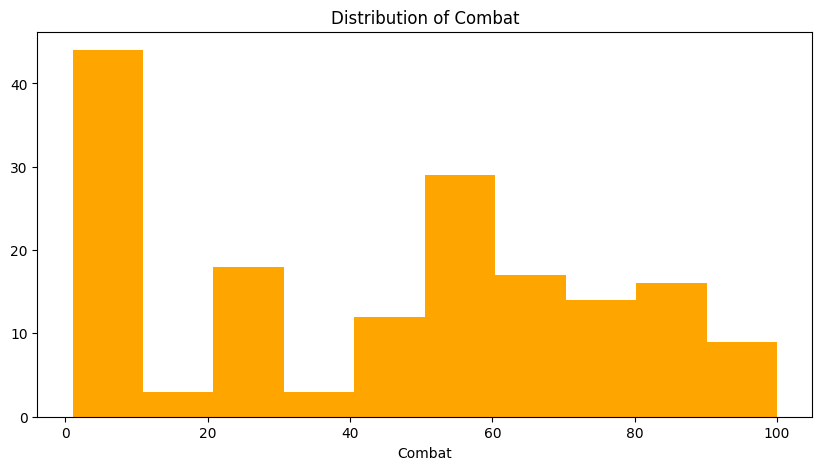

In [40]:
# Making a histogram for combat for supervillians
plt.figure(figsize=(10,5))
plt.hist(bad["Combat"], color="orange")
plt.title("Distribution of Combat")
plt.xlabel("Combat")
plt.show()